In [10]:
import pandas as pd
import numpy  as np

dados = '/content/drive/MyDrive/Colab Notebooks/Dados/qualidade_vinhos.csv'

df_original = pd.read_csv(dados)
df_original

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,mediano
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,mediano
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,mediano
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,mediano
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,mediano
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,mediano
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,mediano
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,mediano
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,mediano


In [11]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acidez fixa                1359 non-null   float64
 1   acidez volátil             1359 non-null   float64
 2   ácido cítrico              1359 non-null   float64
 3   açúcar residual            1359 non-null   float64
 4   cloretos                   1359 non-null   float64
 5   dióxido de enxofre livre   1359 non-null   float64
 6   dióxido de enxofre total   1359 non-null   float64
 7   densidade                  1359 non-null   float64
 8   pH                         1359 non-null   float64
 9   sulfatos                   1359 non-null   float64
 10  álcool                     1359 non-null   float64
 11  qualidade                  1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 127.5+ KB


In [12]:
df_original['qualidade'].unique()

array(['mediano', 'bom', 'ruim'], dtype=object)

In [13]:
df_original['qualidade'].value_counts()

mediano    1112
bom         184
ruim         63
Name: qualidade, dtype: int64

In [14]:
df_original.describe()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [15]:
X = df_original.drop(columns='qualidade')
y = df_original['qualidade']

In [16]:
from sklearn.model_selection import train_test_split

X, X_teste, y, y_teste = train_test_split(X,y, test_size=0.15, stratify=y, random_state=42)
X_treino, X_val, y_treino, y_val = train_test_split(X,y, stratify=y, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(max_depth=10, random_state=42)
modelo.fit(X_treino, y_treino)

y_pred = modelo.predict(X_val)
print(f'Acurácia de Treino: {modelo.score(X_treino,y_treino) * 100}')
print(f'Acurácia de Validação: {modelo.score(X_val, y_val) * 100  }')

Acurácia de Treino: 96.76674364896074
Acurácia de Validação: 82.69896193771626


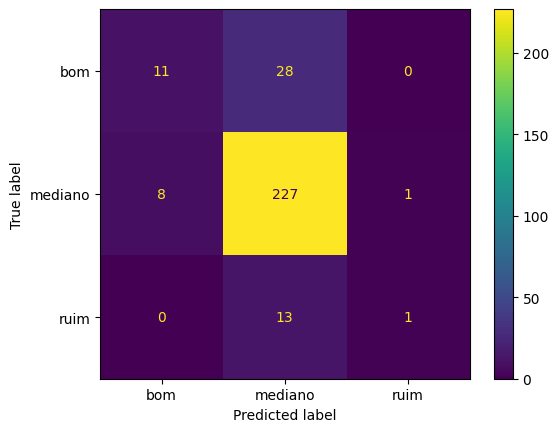

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz_confusao = confusion_matrix(y_val, y_pred)

visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=modelo.classes_)
visualizacao.plot();

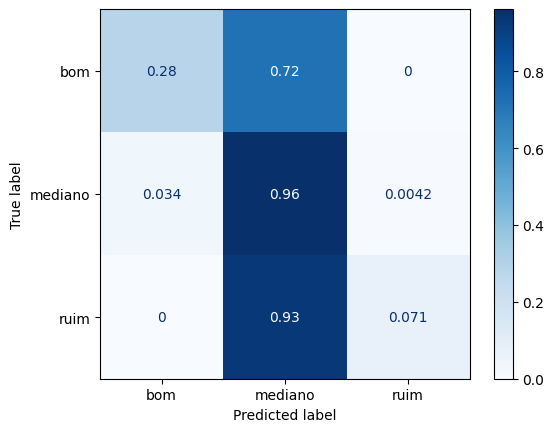

In [21]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues')

In [22]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print('Relátorio de Classificação:\n', report)

Relátorio de Classificação:
               precision    recall  f1-score   support

         bom       0.58      0.28      0.38        39
     mediano       0.85      0.96      0.90       236
        ruim       0.50      0.07      0.12        14

    accuracy                           0.83       289
   macro avg       0.64      0.44      0.47       289
weighted avg       0.79      0.83      0.79       289



In [23]:
y_treino.value_counts()

mediano    709
bom        117
ruim        40
Name: qualidade, dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)

In [25]:
modelo_rf = RandomForestClassifier(random_state=0, max_depth=10)
modelo_rf.fit(X_balanceado,y_balanceado)

y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_balanceado,y_balanceado)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val,y_val)}')

Acurácia de treino: 0.9826046074283028
Acurácia de validação: 0.7335640138408305


Relátorio de Classificação:
               precision    recall  f1-score   support

         bom       0.44      0.56      0.49        39
     mediano       0.88      0.78      0.83       236
        ruim       0.18      0.36      0.24        14

    accuracy                           0.73       289
   macro avg       0.50      0.57      0.52       289
weighted avg       0.78      0.73      0.75       289



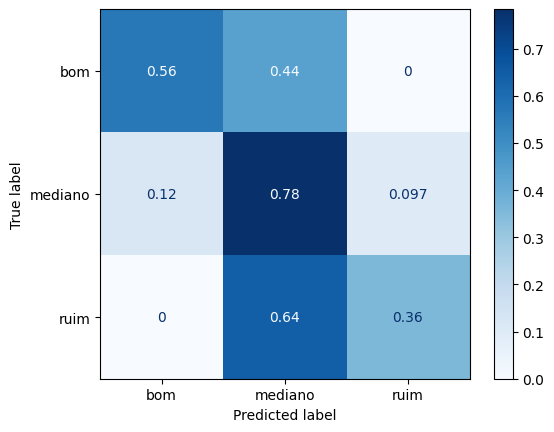

In [26]:
report = classification_report(y_val, y_pred)
print('Relátorio de Classificação:\n', report)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

In [27]:
from imblearn.pipeline import Pipeline as imbpipeline

modelo = RandomForestClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('floresta', modelo)])

In [28]:
from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted')
cv_resultados['test_score']

array([0.72727273, 0.79220779, 0.78354978, 0.76623377, 0.74458874])

In [29]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1.0)}]')

intervalo de confiança: [0.7145959212355203, 0.8109452043056055]


In [32]:
oversample = SMOTE(random_state=42)
X_balanceado, y_balanceado = oversample.fit_resample(X,y)
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado,y_balanceado)
y_pred = modelo.predict(X_teste)

              precision    recall  f1-score   support

         bom       0.38      0.64      0.48        28
     mediano       0.88      0.72      0.80       167
        ruim       0.10      0.22      0.14         9

    accuracy                           0.69       204
   macro avg       0.46      0.53      0.47       204
weighted avg       0.78      0.69      0.72       204



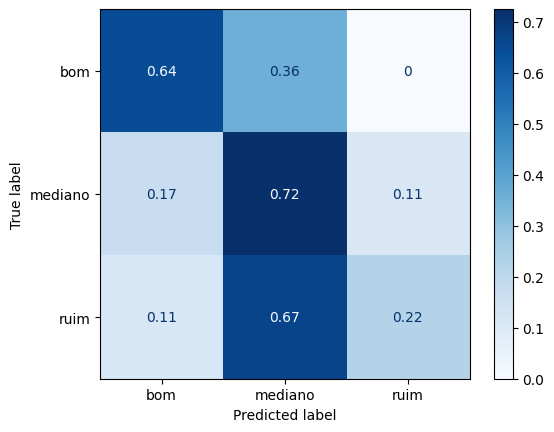

In [33]:
print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize='true', cmap='Blues');